In [24]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#### PreProcessing

Refer to [EDA and Preprocessing Directory](../../EDA%20&%20Preprocessing/EDA.md) to learn about Preprocessing techniques according to the type of data you are dealing with



In [25]:

df = pd.read_csv("../datasets/Housing.csv")
# Define feature and target variables
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
             'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
target = 'price'

# Separate target variable 'y' and features 'X'
X = df[features]
y = df[target]

# Define categorical and numerical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                         'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                   # Standard scaling
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encoding
])

# Bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


#### Implementing Linear Regression

In [27]:
# Implement Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train_preprocessed, y_train)  # Train the model
y_pred = model.predict(X_test_preprocessed)  # Predict on the test data

#### Evaluating the Model

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error (MSE): 1754318687330.669
Root Mean Squared Error (RMSE): 1324506.960
R^2 Score: 0.653


#### Visualising Performance Using Scatter Plots

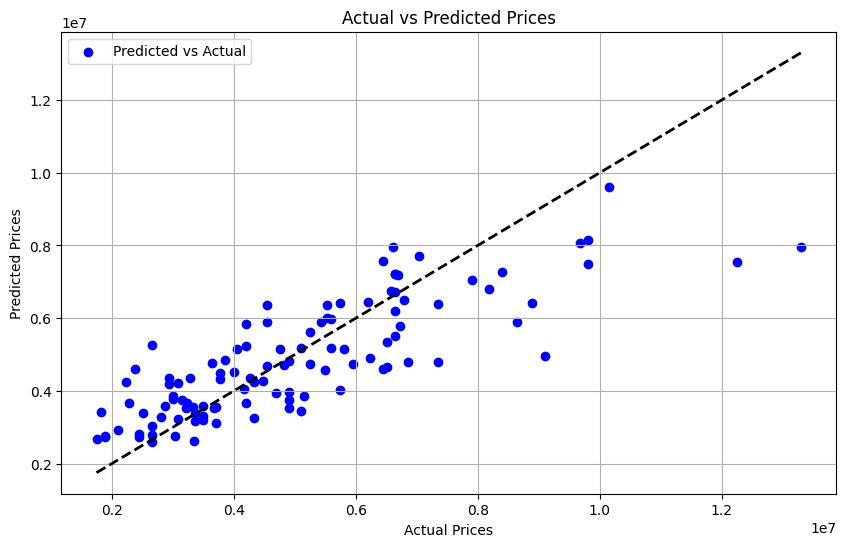

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()